<a href="https://colab.research.google.com/github/sarvanipiratla/demoprojects/blob/main/Fremont_Bridge_Bicycle_counts_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
data = pd.read_csv('/content/fremont-bridge.csv', index_col = 'Date', parse_dates = True)
data.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [4]:
data.columns = ['West', 'East']
data['Total'] = data['West'] + data['East']
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [5]:
data.dropna().describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


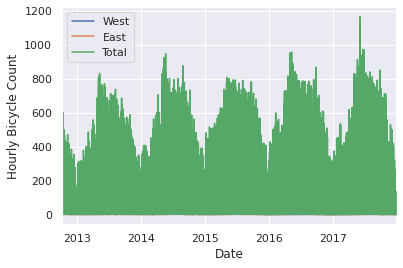

In [6]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
data.plot()
plt.ylabel('Hourly Bicycle Count')
plt.show()

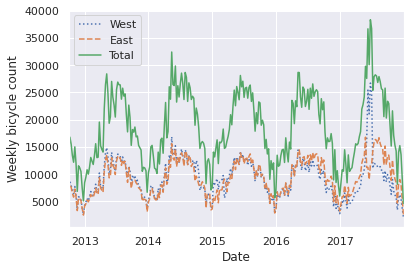

In [7]:
weekly = data.resample('W').sum()
weekly.plot(style = [':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

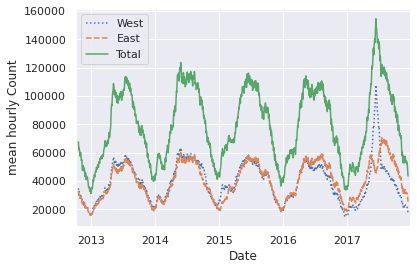

In [8]:
daily = data.resample('D').sum()
daily.rolling(30, center = True).sum().plot(style = [':', '--', '-'])
plt.ylabel('mean hourly Count')
plt.show()

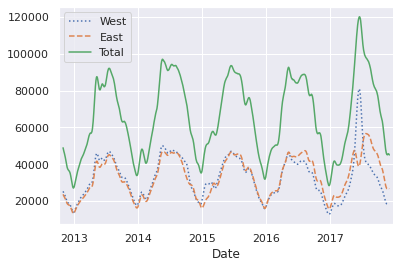

In [10]:
daily.rolling(50, center = True, win_type = 'gaussian').sum(std = 10).plot(style = [':', '--', '-'])
plt.show()

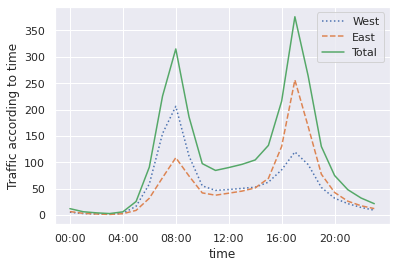

In [11]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4*60*60*np.arange(6)
by_time.plot(xticks = hourly_ticks, style = [':', '--', '-'])
plt.ylabel('Traffic according to time')
plt.show()